#### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

## 1. Loading the data

In [2]:
spotify_data = pd.read_csv("spotify-2023.csv", encoding ='ISO-8859-1')
spotify_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
spotify_data.shape

(953, 24)

In [4]:
data_summary = spotify_data.describe(include='all')
data_summary

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953,953,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953,953.000000,...,953.000000,858,953,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
unique,943,645,NaN,NaN,NaN,NaN,NaN,NaN,949,NaN,...,NaN,11,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Daylight,Taylor Swift,NaN,NaN,NaN,NaN,NaN,NaN,723894473,NaN,...,NaN,C#,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,34,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,...,NaN,120,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,NaN,67.812172,...,122.540399,NaN,NaN,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,NaN,NaN,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,NaN,86.441493,...,28.057802,NaN,NaN,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,NaN,NaN,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,NaN,0.000000,...,65.000000,NaN,NaN,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,NaN,NaN,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,NaN,13.000000,...,100.000000,NaN,NaN,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,NaN,NaN,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,NaN,34.000000,...,121.000000,NaN,NaN,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,NaN,NaN,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,NaN,88.000000,...,140.000000,NaN,NaN,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000


In [5]:
missing_values = spotify_data.isnull().sum()
missing_values

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [6]:
spotify_data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

## 2. Distribution of precentage features

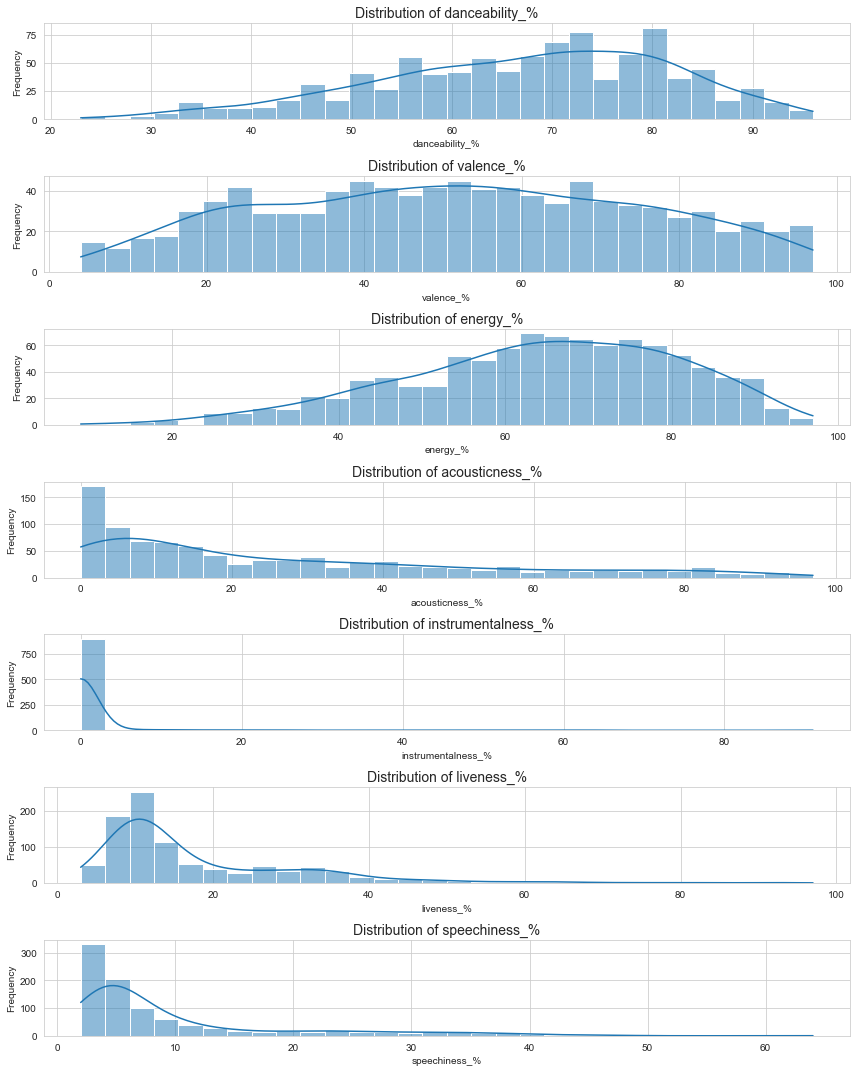

In [10]:
sns.set_style('whitegrid')
features_to_visualize = spotify_data.columns[-7:]

fig, axes = plt.subplots(nrows = len(features_to_visualize), figsize =(12,15))

for i, feature in enumerate(features_to_visualize):
    sns.histplot(spotify_data[feature], ax=axes[i], bins = 30, kde = True)
    axes[i].set_title(f'Distribution of {feature}', fontsize =14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

## 3. Top 10 songs based on their presence in spotify playlist

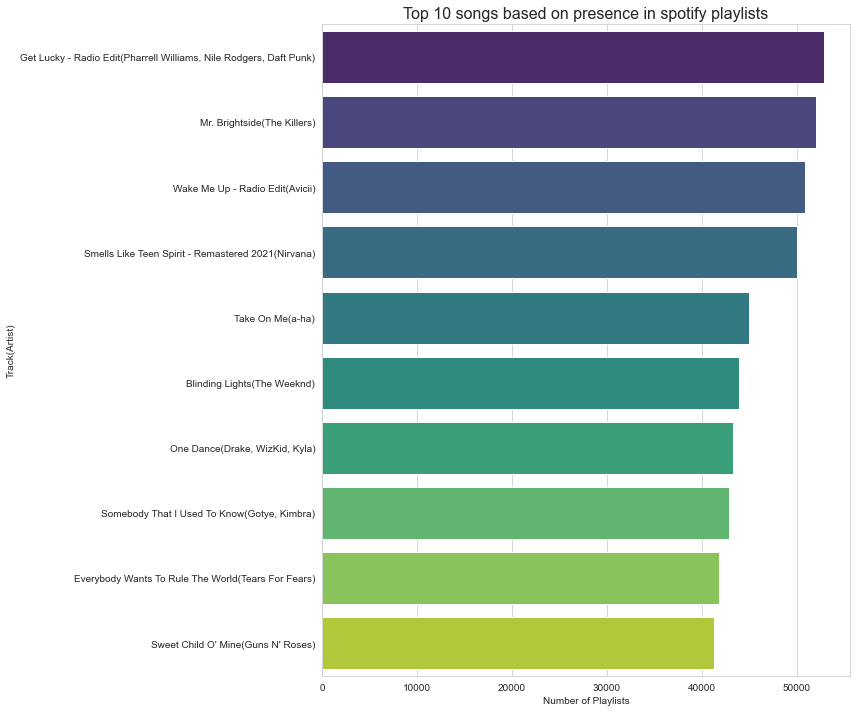

In [12]:
top_songs_in_playlist = spotify_data.sort_values(by ="in_spotify_playlists", ascending = False).head(10)

#combining track name and artist name
top_songs_in_playlist['track_artist'] = top_songs_in_playlist['track_name']+"("+ top_songs_in_playlist['artist(s)_name'] +")"

#plotiing the song with artist name

plt.figure(figsize = (12,10))
sns.barplot(x = top_songs_in_playlist['in_spotify_playlists'], y = top_songs_in_playlist['track_artist'],
           palette="viridis", orient = 'h')

plt.title('Top 10 songs based on presence in spotify playlists', fontsize = 16)
plt.xlabel("Number of Playlists")
plt.ylabel("Track(Artist)")
plt.tight_layout()
plt.show()

## 4. Top 10 artist based on total streams

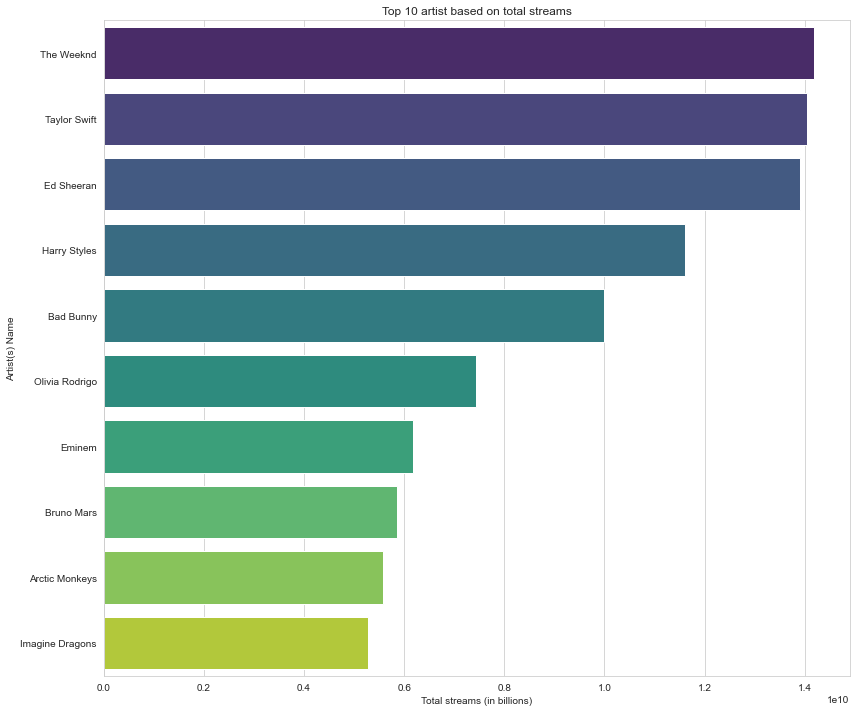

In [13]:
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors = 'coerce')

#Grouping by atrist again and summing up their streams

artist_streams = spotify_data.groupby('artist(s)_name')['streams'].sum().sort_values(ascending = False).head(10)

plt.figure(figsize = (12,10))
sns.barplot(x = artist_streams.values, y = artist_streams.index, palette='viridis', orient ='h')
plt.title('Top 10 artist based on total streams')
plt.xlabel('Total streams (in billions)')
plt.ylabel('Artist(s) Name')
plt.tight_layout()
plt.show()

## 5.Streams Vs precentage features

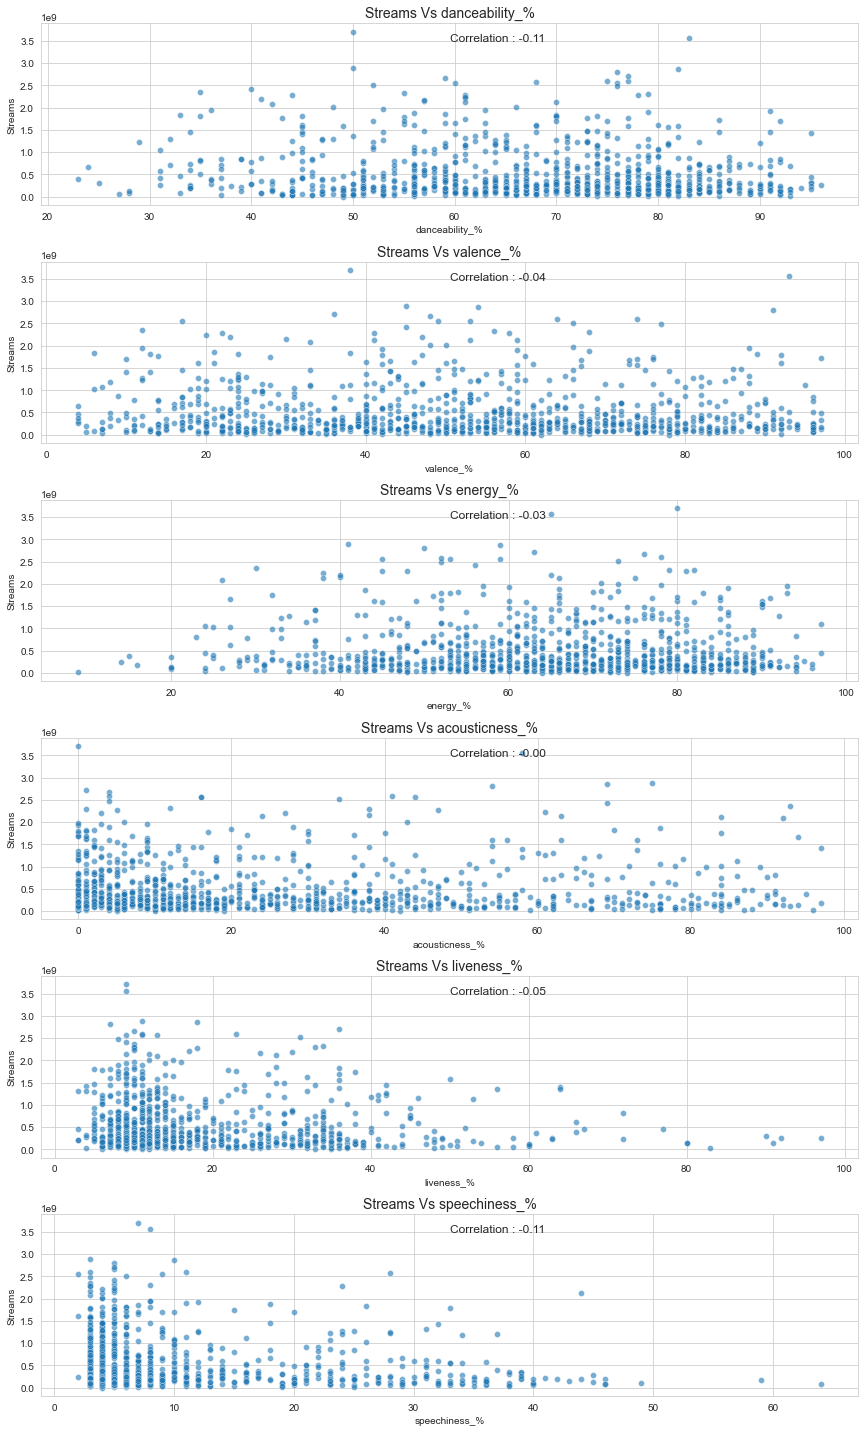

In [17]:
#list of features to compare with stream 
features = ['danceability_%', 'valence_%','energy_%','acousticness_%','liveness_%','speechiness_%']

fig, axes = plt.subplots(nrows = len(features), figsize =(12,20))

correlations = {}
for i, feature in enumerate(features):
    sns.scatterplot(x=spotify_data[feature], y=spotify_data['streams'], ax = axes[i], alpha = 0.6)
    axes[i].set_title(f'Streams Vs {feature}', fontsize=14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Streams')
    corr = spotify_data['streams'].corr(spotify_data[feature])
    correlations[feature]= corr
    axes[i].annotate(f'Correlation : {corr:.2f}', xy =(0.5, 0.9), xycoords='axes fraction', fontsize =12)
    
plt.tight_layout()
plt.show()

In [16]:
correlations

{'danceability_%': -0.1054568836914191,
 'valence_%': -0.04083136749515947,
 'energy_%': -0.026051488364248927,
 'acousticness_%': -0.004484652700684072,
 'liveness_%': -0.04833729577983246,
 'speechiness_%': -0.1123329964033855}

* Stream Vs Danceability : a slightly negative correlation (r = -0.105), suggests that tracks with higher danceability tend to have slightly fewer streams, although the relationship is weak.

* Stream Vs Valence : a very weak negative correlation (r = -0.041), implying that the mood of track (from sad to happy) has little influence on the number of streams

* Stream Vs Energy : an even weaker negative correlation (r = -0.026), suggesting that the energy of track has minimal impact on streaming

* Stream Vs Acousticness : almost no correlation (r = -0.004), indicating that acousticness of track does not significantly influence its streams

* Stream Vs Liveness : a weak negative correlation (r = -0.048), suggesting that tracks recorded live might have slightly few streams

* Streams Vs speechiness : a slightly negative correlation (r = -0.112), suggesting that tracks with  more spoken words or rap might have slightly fewer streams

## 6. Precentage feature vs top artist

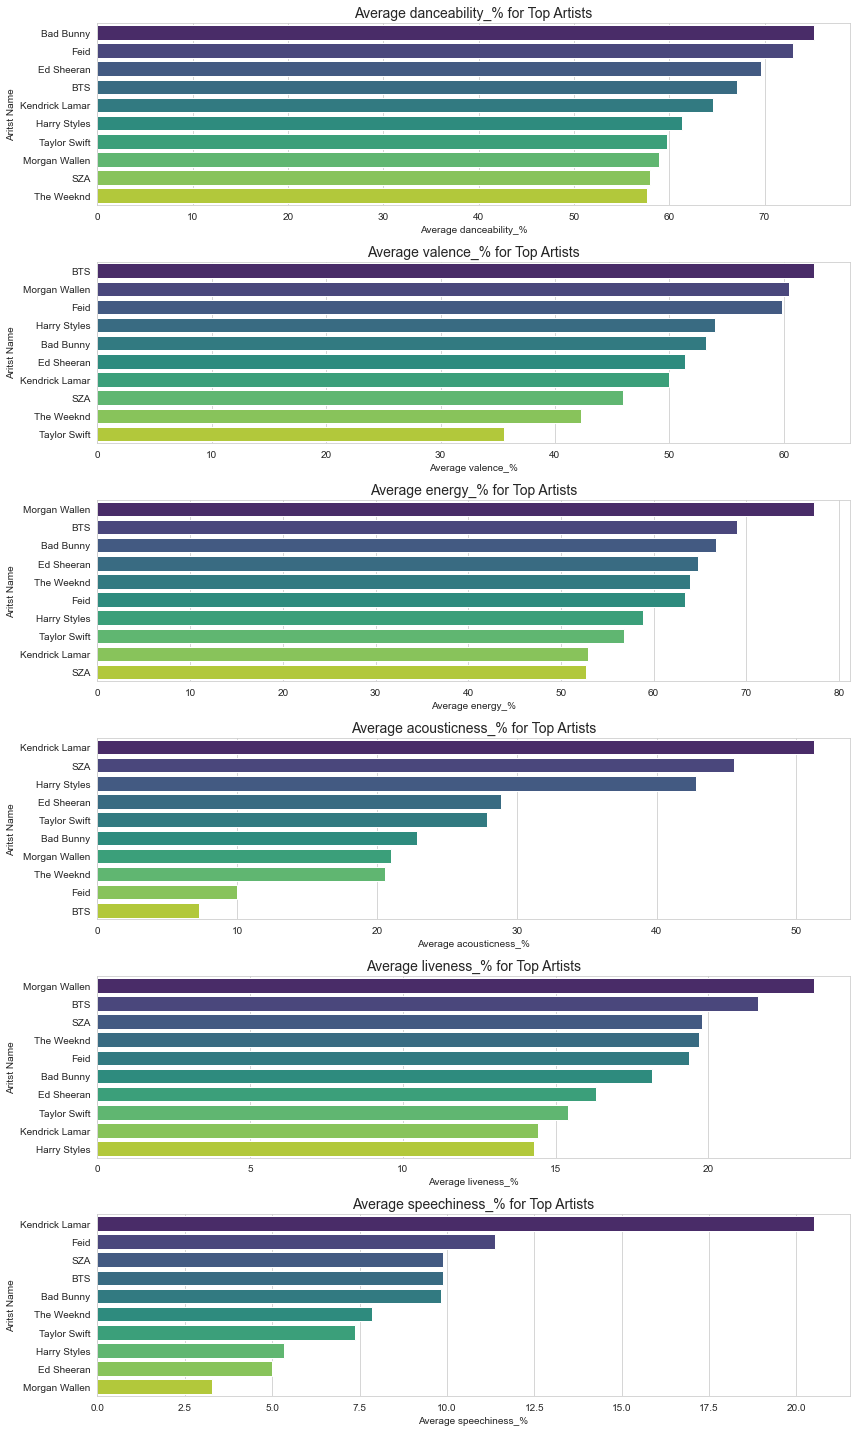

In [51]:
#selecting top artist based on number of songs they have in dataset
top_artists = spotify_data['artist(s)_name'].value_counts().head(10)

#filtering data of only these top artists
top_artist_data = spotify_data[spotify_data['artist(s)_name'].isin(top_artists.index)]

fig, axes = plt.subplots(nrows = len(features), figsize = (12,20))

for i, feature in enumerate(features):
    artist_feature_avg = top_artist_data.groupby('artist(s)_name')[feature].mean().sort_values(ascending=False)
    sns.barplot(x=artist_feature_avg.values , y= artist_feature_avg.index, ax = axes[i], palette='viridis')
    axes[i].set_title(f"Average {feature} for Top Artists", fontsize = 14)
    axes[i].set_xlabel(f"Average {feature}")
    axes[i].set_ylabel("Aritst Name")
    
plt.tight_layout()
plt.show()

## 7.Temporal Analysis

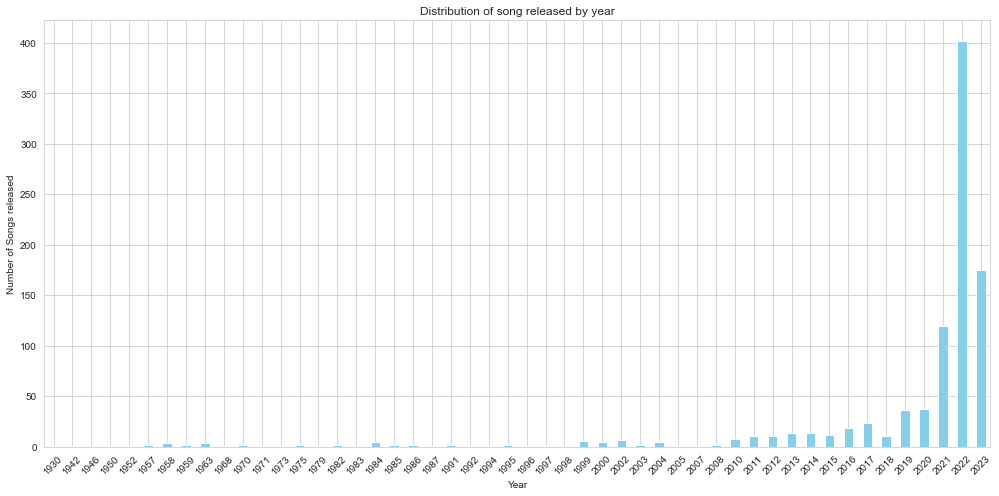

In [55]:
#chceking unique values for released_year, release_month and released_day
unique_values = {
    'released_year' : spotify_data['released_year'].unique(),
    'released_month' : spotify_data['released_month'].unique(),
    'released_day' : spotify_data['released_day'].unique()
}

#creating 'release_data_string' column
spotify_data['released_date_string'] = spotify_data['released_year'].astype('str') + '-' + \
                                       spotify_data['released_month'].astype('str') + '-' + \
                                       spotify_data['released_day'].astype('str')

#converting 'released_date_string' column to datetime column
spotify_data['release_date'] = pd.to_datetime(spotify_data['released_date_string'], errors='coerce')

#rechecking the distribution of song released by year
yearly_released = spotify_data['release_date'].dt.year.value_counts().sort_index()

plt.figure(figsize=(14,7))
yearly_released.plot(kind='bar', color = 'skyblue')
plt.title("Distribution of song released by year")
plt.xlabel('Year')
plt.ylabel('Number of Songs released')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

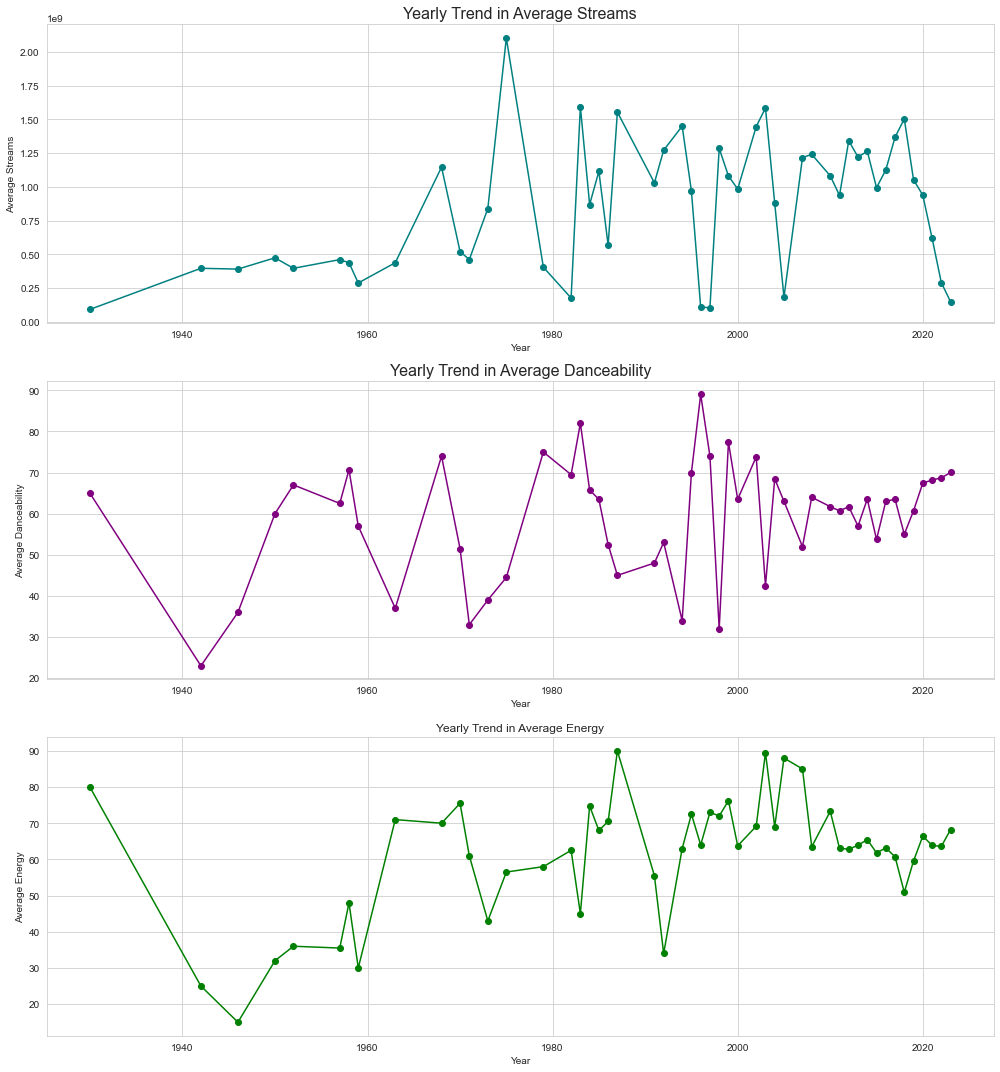

In [58]:
#calculating yearly average for streams, danceability, and energy
yearly_average = spotify_data.groupby(spotify_data['release_date'].dt.year)[['streams','danceability_%','energy_%']].mean()

fig, axes = plt.subplots(nrows=3, figsize=(14,15))

#average streams per year
axes[0].plot(yearly_average.index, yearly_average['streams'], marker='o', color ='teal')
axes[0].set_title('Yearly Trend in Average Streams', fontsize = 16)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Streams')
axes[0].grid(True)

#average danceability per year
axes[1].plot(yearly_average.index, yearly_average['danceability_%'], marker='o', color = 'purple')
axes[1].set_title('Yearly Trend in Average Danceability', fontsize =16)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Danceability')
axes[1].grid(True)

#average energy per year
axes[2].plot(yearly_average.index, yearly_average['energy_%'], marker='o', color='green')
axes[2].set_title('Yearly Trend in Average Energy')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Average Energy')
axes[2].grid(True)

plt.tight_layout()
plt.show()

## 8.Comparison Across Platform

In [59]:
spotify_data['in_spotify_playlists']

0       553
1      1474
2      1397
3      7858
4      3133
       ... 
948     953
949    1180
950     573
951    1320
952     782
Name: in_spotify_playlists, Length: 953, dtype: int64

In [60]:
spotify_data['in_apple_playlists']

0       43
1       48
2       94
3      116
4       84
      ... 
948     61
949      4
950      2
951     29
952     27
Name: in_apple_playlists, Length: 953, dtype: int64

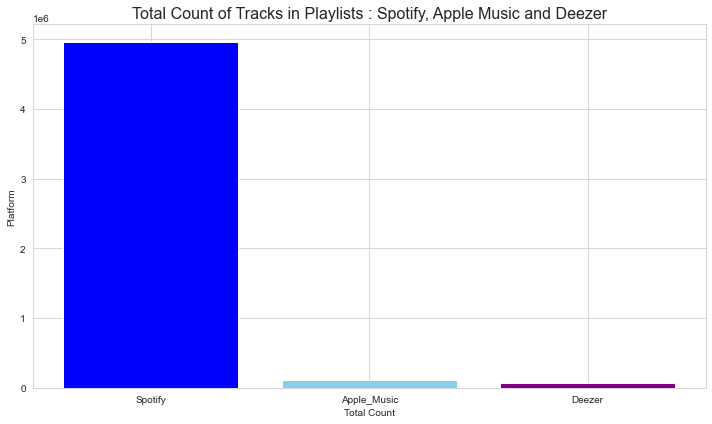

In [73]:
#calculating the total count of tracks present in playlist/charts for spotify, Apple music, and Deezer
spotify_data['in_deezer_playlists'] = spotify_data['in_apple_playlists'].astype(int)
total_counts = {
    'Spotify' : spotify_data['in_spotify_playlists'].sum() + spotify_data['in_spotify_charts'].sum(),
    'Apple_Music' : spotify_data['in_apple_playlists'].sum() + spotify_data['in_apple_charts'].sum(),
    'Deezer' : spotify_data['in_deezer_playlists'].sum() + spotify_data['in_deezer_charts'].sum()
}

# ploting total count comparision

plt.figure(figsize =(10,6))
plt.bar(total_counts.keys(),total_counts.values(), color =['blue','skyblue','purple'])
plt.title('Total Count of Tracks in Playlists : Spotify, Apple Music and Deezer', fontsize =16)
plt.xlabel('Total Count')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

In [75]:
#Identify top 10 songs for spotify based on their presence in playlists and charts

top_song_spotify = spotify_data[['track_name', 'artist(s)_name','in_spotify_playlists','in_spotify_charts']]
top_song_spotify['spotify_total'] = top_song_spotify['in_spotify_playlists'] + top_song_spotify['in_spotify_charts']
top_song_spotify = top_song_spotify.sort_values(by='spotify_total',ascending=False).head(10)

#Identyfy top 10 songs for Apple music based on their presence in playlists and charts

top_song_apple = spotify_data[['track_name','artist(s)_name','in_apple_playlists','in_apple_charts']]
top_song_apple['apple_total'] = top_song_apple['in_apple_playlists'] + top_song_apple['in_apple_charts']
top_song_apple = top_song_apple.sort_values(by='apple_total', ascending=False).head(10)

#Identyfy top 10 songs for Deezer music based on their presence in playlists and charts

top_song_deezer = spotify_data[['track_name','artist(s)_name','in_deezer_playlists','in_deezer_charts']]
top_song_deezer['deezer_total'] = top_song_deezer['in_deezer_playlists'] + top_song_deezer['in_deezer_charts']
top_song_deezer = top_song_deezer.sort_values(by='deezer_total', ascending=False).head(10)


C:\Users\Prerana\AppData\Local\Temp\ipykernel_9848\3446045647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_song_spotify['spotify_total'] = top_song_spotify['in_spotify_playlists'] + top_song_spotify['in_spotify_charts']
C:\Users\Prerana\AppData\Local\Temp\ipykernel_9848\3446045647.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_song_apple['apple_total'] = top_song_apple['in_apple_playlists'] + top_song_apple['in_apple_charts']
C:\Users\Prerana\AppData\Local\Temp\ipykernel_9848\3446045647

In [77]:
top_song_spotify

,track_name,artist(s)_name,in_spotify_playlists,in_spotify_charts,spotify_total
757,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",52898,0,52898
630,Mr. Brightside,The Killers,51979,15,51994
720,Wake Me Up - Radio Edit,Avicii,50887,34,50921
624,Smells Like Teen Spirit - Remastered 2021,Nirvana,49991,9,50000
199,Take On Me,a-ha,44927,17,44944
55,Blinding Lights,The Weeknd,43899,69,43968
162,One Dance,"Drake, WizKid, Kyla",43257,24,43281
727,Somebody That I Used To Know,"Gotye, Kimbra",42798,0,42798
114,Everybody Wants To Rule The World,Tears For Fears,41751,25,41776
871,Sweet Child O' Mine,Guns N' Roses,41231,1,41232


In [78]:
top_song_apple

,track_name,artist(s)_name,in_apple_playlists,in_apple_charts,apple_total
55,Blinding Lights,The Weeknd,672,199,871
620,Dance Monkey,Tones and I,533,167,700
403,One Kiss (with Dua Lipa),"Calvin Harris, Dua Lipa",537,122,659
407,Don't Start Now,Dua Lipa,532,77,609
14,As It Was,Harry Styles,403,198,601
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",492,99,591
86,Someone You Loved,Lewis Capaldi,440,125,565
127,Watermelon Sugar,Harry Styles,437,115,552
162,One Dance,"Drake, WizKid, Kyla",433,107,540
71,Heat Waves,Glass Animals,386,144,530


In [79]:
top_song_deezer

,track_name,artist(s)_name,in_deezer_playlists,in_deezer_charts,deezer_total
55,Blinding Lights,The Weeknd,672,20,692
403,One Kiss (with Dua Lipa),"Calvin Harris, Dua Lipa",537,6,543
620,Dance Monkey,Tones and I,533,6,539
407,Don't Start Now,Dua Lipa,532,3,535
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",492,31,523
693,Seï¿½ï¿½o,"Shawn Mendes, Camila Cabello",453,1,454
14,As It Was,Harry Styles,403,46,449
127,Watermelon Sugar,Harry Styles,437,12,449
86,Someone You Loved,Lewis Capaldi,440,0,440
162,One Dance,"Drake, WizKid, Kyla",433,0,433


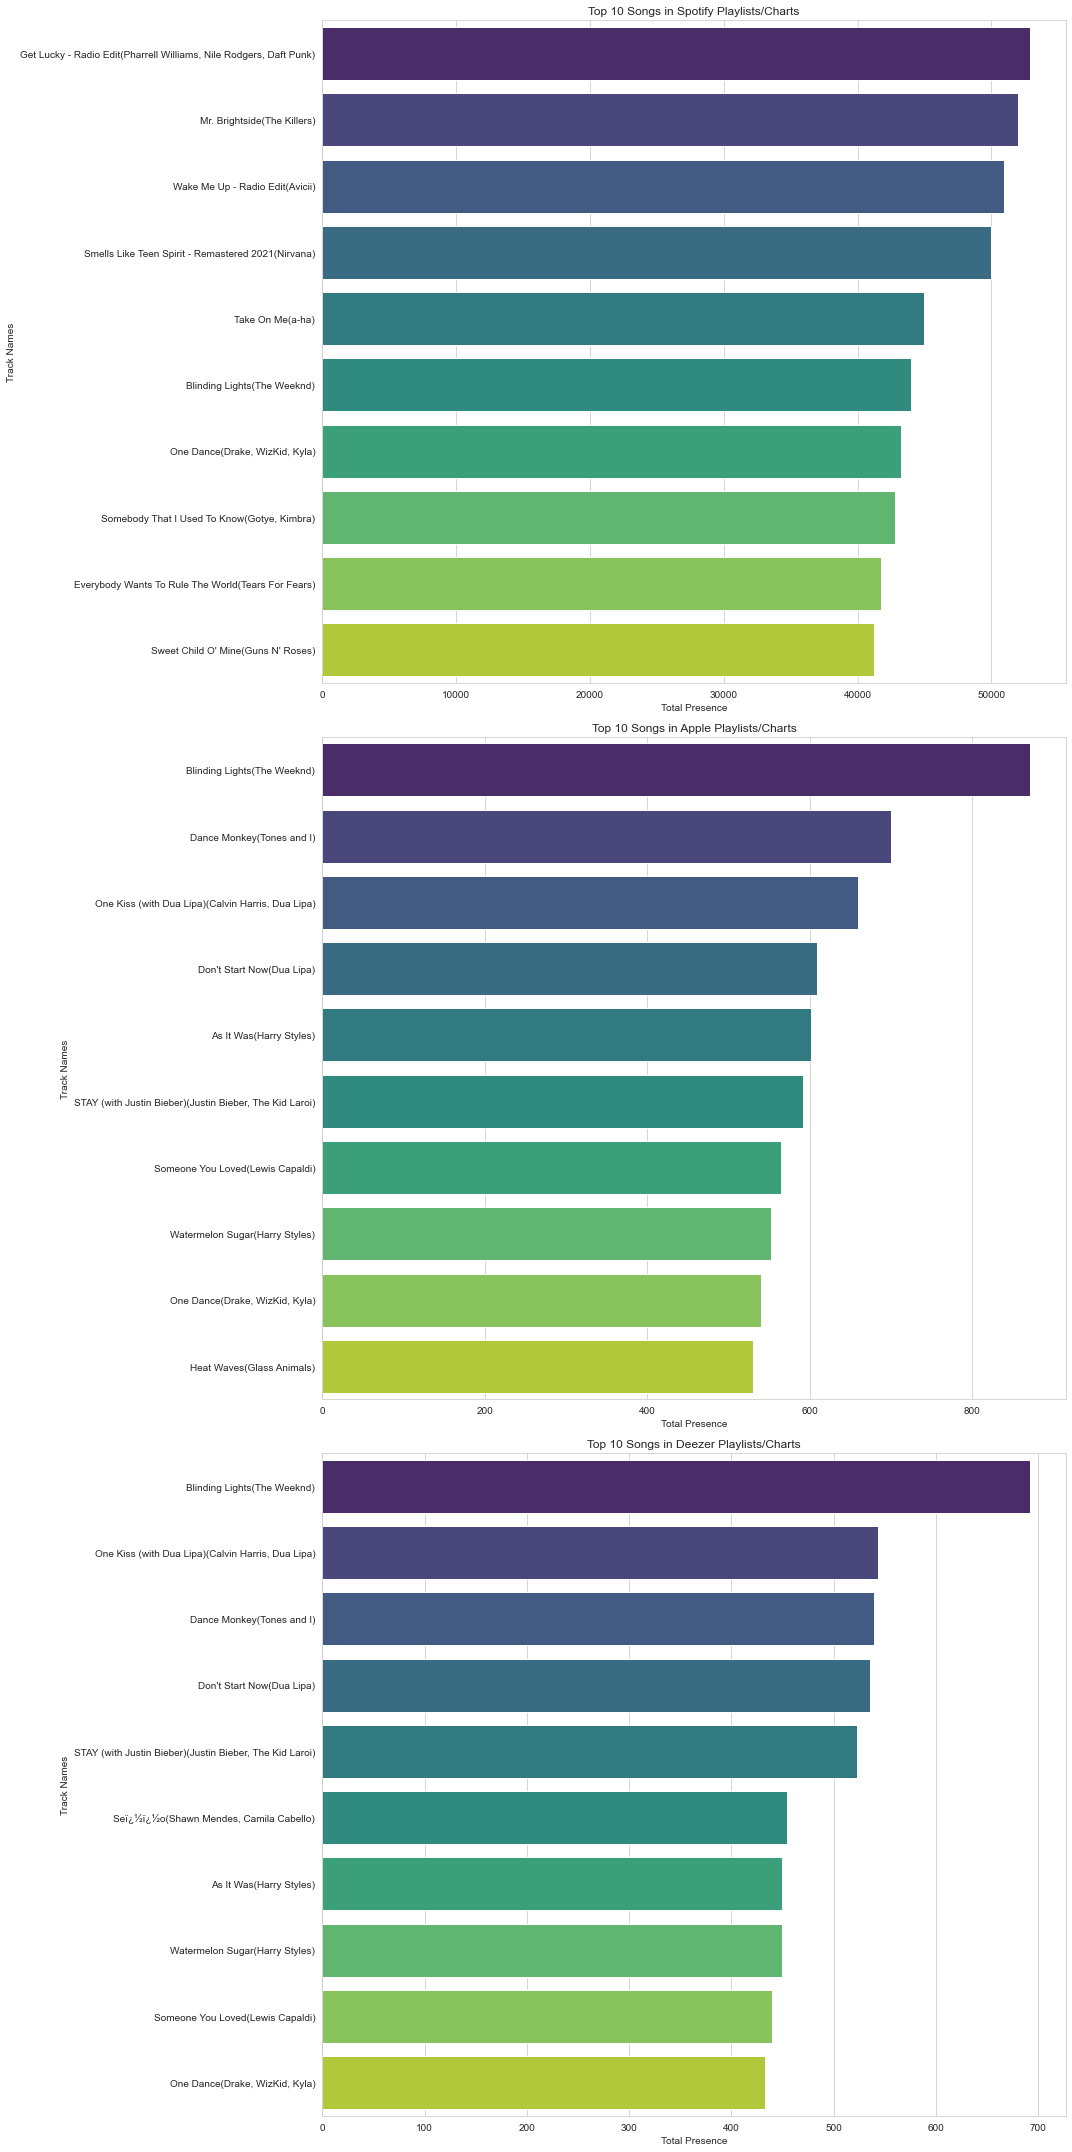

In [89]:
fig, axes = plt.subplots(nrows=3, figsize=(15,30))

sns.barplot(x=top_song_spotify['spotify_total'], y= top_song_spotify['track_name']+'('+top_song_spotify['artist(s)_name']+')',
            palette ='viridis', ax=axes[0])
axes[0].set_title('Top 10 Songs in Spotify Playlists/Charts')
axes[0].set_xlabel('Total Presence')
axes[0].set_ylabel('Track Names')

sns.barplot(x=top_song_apple['apple_total'],y=top_song_apple['track_name']+'('+top_song_apple['artist(s)_name']+')',
           palette='viridis', ax=axes[1])
axes[1].set_title('Top 10 Songs in Apple Playlists/Charts')
axes[1].set_xlabel('Total Presence')
axes[1].set_ylabel('Track Names')

sns.barplot(x=top_song_deezer['deezer_total'],y=top_song_deezer['track_name']+'('+top_song_deezer['artist(s)_name']+')',
           palette='viridis',ax=axes[2])
axes[2].set_title('Top 10 Songs in Deezer Playlists/Charts')
axes[2].set_xlabel('Total Presence')
axes[2].set_ylabel('Track Names')

plt.tight_layout()
plt.show()

## 9.Artist Collabration

In [91]:
#Identify collabration by splitting the artist(s)_name columns

spotify_data['artists_list'] = spotify_data['artist(s)_name'].str.split(', ')
collabrations = spotify_data[spotify_data['artists_list'].apply(len)>1]
collabrations[['track_name','artist(s)_name','streams','in_spotify_playlists','in_spotify_charts']].head(10)

,track_name,artist(s)_name,streams,in_spotify_playlists,in_spotify_charts
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",141381703.0,553,147
5,Sprinter,"Dave, Central Cee",183706234.0,2186,91
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",725980112.0,3090,50
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",553634067.0,2953,44
10,un x100to,"Bad Bunny, Grupo Frontera",505671438.0,2876,40
18,Classy 101,"Feid, Young Miko",335222234.0,2610,40
20,LADY GAGA,"Gabito Ballesteros, Junior H, Peso Pluma",86444842.0,332,26
23,"Peso Pluma: Bzrp Music Sessions, Vol. 55","Bizarrap, Peso Pluma",200647221.0,1313,40
24,Popular (with Playboi Carti & Madonna) - The I...,"The Weeknd, Madonna, Playboi Carti",115364561.0,1945,87
26,Calm Down (with Selena Gomez),"Rï¿½ï¿½ma, Selena G",899183384.0,7112,77


C:\Users\Prerana\AppData\Local\Temp\ipykernel_9848\3254711790.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collabrations['artist_combinations'] = collabrations['artists_list'].apply(get_artist_combinations)


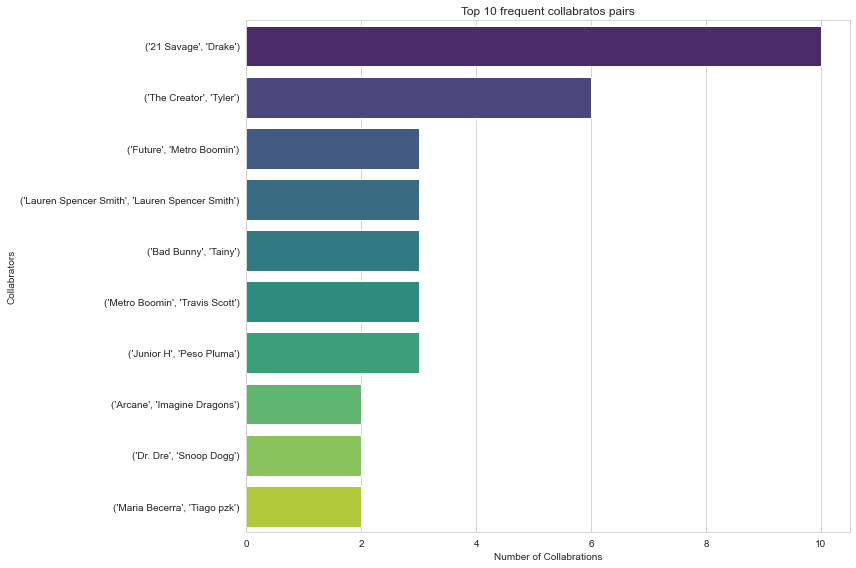

In [98]:
#Function to get all combinations of artist for each track

def get_artist_combinations(artist_list):
    return list(combinations(sorted(artist_list),2))

collabrations['artist_combinations'] = collabrations['artists_list'].apply(get_artist_combinations)

#Flatten the list of artist combination  to count the frequency of each combination
all_combinations = [combo for sublist in collabrations['artist_combinations'] for combo in sublist]
frequent_collabration = pd.Series(all_combinations).value_counts().head(10)

plt.figure(figsize=(12,8))
sns.barplot(x=frequent_collabration.values,y=frequent_collabration.index, palette='viridis')
plt.title('Top 10 frequent collabratos pairs')
plt.xlabel('Number of Collabrations')
plt.ylabel('Collabrators')
plt.tight_layout()
plt.show()

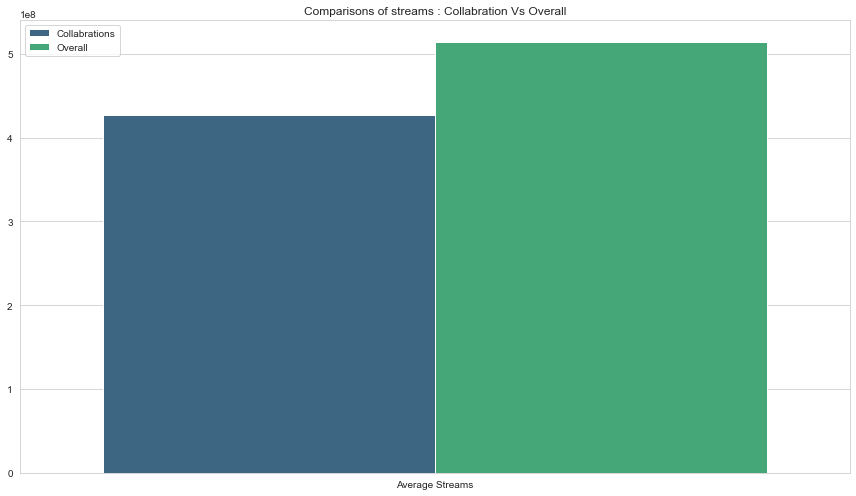

In [99]:
#Calculaing average streams and presence in playlists for collbrative tracks

collab_avg_streams = collabrations['streams'].mean()
overall_avg_streams = spotify_data['streams'].mean()

data = {'Metrics':['Average Streams'],
       'Collabrations':[collab_avg_streams],
       'Overall':[overall_avg_streams]}

comparison_df = pd.DataFrame(data).melt(id_vars=['Metrics'],value_vars=['Collabrations','Overall'])

plt.figure(figsize=(12,7))
sns.barplot(x='Metrics',y='value',hue='variable', data=comparison_df, palette='viridis')
plt.title('Comparisons of streams : Collabration Vs Overall')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='')
plt.tight_layout()
plt.show()

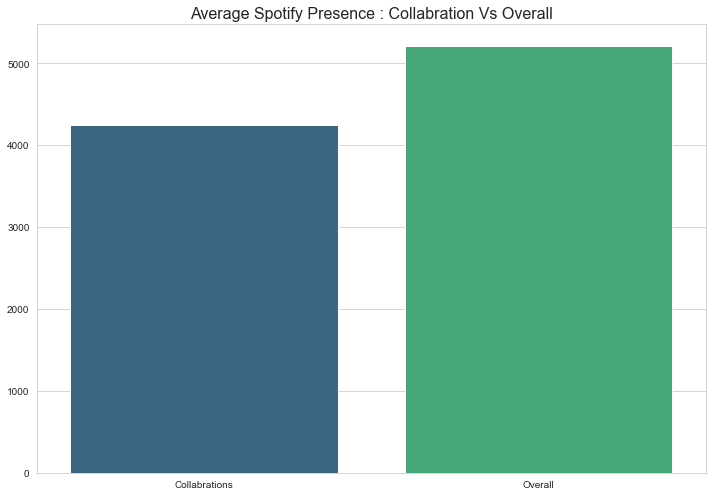

In [100]:
#Recalculation average spotify presence for collabrative tracks and overall tracks

collab_avg_spotify_presence = (collabrations['in_spotify_playlists']+collabrations['in_spotify_charts']).mean()
overall_avg_spotify_presence = (spotify_data['in_spotify_playlists']+spotify_data['in_spotify_charts']).mean()

labels = ['Collabrations','Overall']
values = [collab_avg_spotify_presence,overall_avg_spotify_presence]

plt.figure(figsize=(10,7))
sns.barplot(x=labels,y=values,palette='viridis')
plt.title('Average Spotify Presence : Collabration Vs Overall', fontsize = 16)

plt.tight_layout()
plt.show()

In [ ]:
#end